In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

In [2]:
# GROUP SPEED 

In [3]:
replicates = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
treatments = [
    'RB2',
    'RB+TB',
    'TB2'
]

vel = np.empty((20, 3), dtype=object)
pos = np.empty((20, 3), dtype=object)

for t, treatment in enumerate(treatments):
    for r, replicate in enumerate(replicates):
        filename = f'/Users/jahanvitiwari/Desktop/Arshad modified codes/cleaned data GS2/GS2_{treatment}_{replicate}_traj.npz'
        try:
            data = np.load(filename)
            vel[r][t] = data['velocities']
            pos[r][t] = data['positions']
        except:
            print(f'File: {filename} not found.')

In [4]:
#bodylength values where rows=replicates and col=treatment

bl = np.array([
    [2.825,	3.095,	3.555],
[2.81,	2.64,	3.785],
[4.225,	3.47,	3.475],
[2.73,	3.225,	2.975],
[3.34,	3.105,	3.395],
[2.835,	3.1,	3.295],
[3.075,	3.175,	3.415],
[3.435,	3.73,	3.49],
[3.27,	3.235,	3.03],
[3.33, 3.495,	3.13],
[3.325,	3.1,	3.21],
[3.285,	3.25,	3.135],
[3.5,	3.105,	2.97],
[3.73,	2.945,	3.315],
[3.37,	3.065,	3.255],
[3.7,	3.195,	3.16],
[3.43,	3.135,	3.48],
[3.185,	3.515,	3.19],
[3.35,	3.62,	3.18],
[3.705,	3.295,	2.72],
])

bl.shape

(20, 3)

In [5]:
for t in range(3):
    for r in range(20):
        vel[r][t] /= bl[r][t] 
        pos[r][t] /= bl[r][t]

In [6]:
# GROUP SPEED ANALYSIS

In [7]:
speed = np.empty_like(vel)
for t in range(3):
    for r in range(20):
        speed[r][t] = np.linalg.norm(vel[r][t], axis=2)

In [8]:
for t in range(3):
    for r in range(20):
        speed[r][t][speed[r][t] < 0.01] = np.nan

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

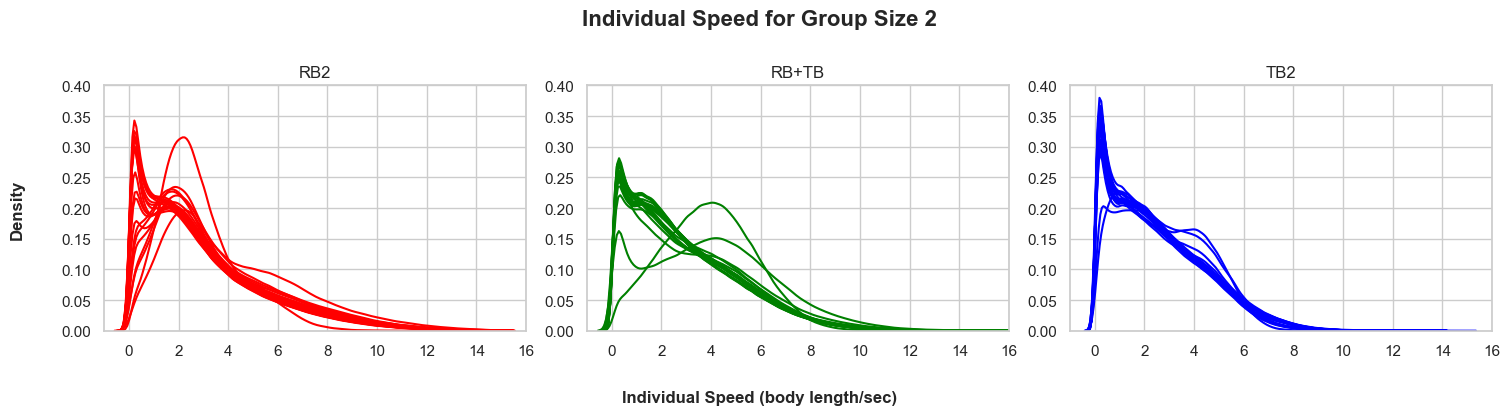

In [13]:
#INDIVIDUAL SPEED PLOT (CONCATENATE)
sns.set(style='whitegrid')
sns.set_palette('muted')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

colors = ['red', 'green', 'blue']

for i in range(3): # treatment
    s = np.empty((0, 2))
    for j in range(20): #replicate
        s = np.concatenate((s, speed[j][i]))
        
        sns.kdeplot(s.ravel(), ax=axes[i], fill=False, color=colors[i])
        
        
        axes[i].set_ylim(0, 0.4)
        axes[i].set_xlim(-1, 16)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        axes[i].set_title(f'{treatments[i]}')

fig.suptitle('Individual Speed for Group Size 2', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Individual Speed (body length/sec)', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('individual_speed_concatenate_GS2_bl.png', bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/yx/fr740nw51gx5ylj1n1z8jp7c0000gn/T/ipykernel_1165/2032011696.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


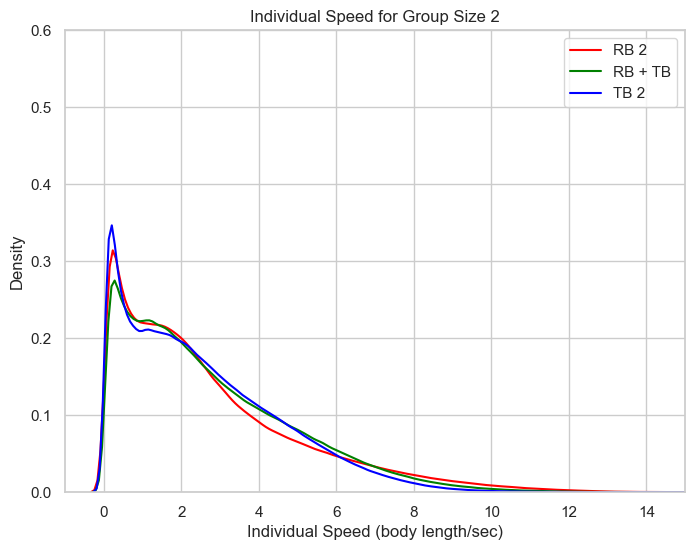

In [12]:
# INDIVIDUAL SPEED PLOT

sns.set(style='whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize=(8, 6))

colors = ['red','green', 'blue']
labels = ['RB 2', 'RB + TB', 'TB 2']
for i in range(3): # treatment
    s = np.empty((0, 2))
    for j in range(20): #replicate
        s = np.concatenate((s, speed[j][i]))
        
    sns.kdeplot(s.ravel(), fill=False, color=colors[i], label=labels[i])
    plt.xlim(-1,15)
    plt.ylim(0,0.6)

plt.title("Individual Speed for Group Size 2")
plt.xlabel("Individual Speed (body length/sec)")
plt.ylabel("Density")
plt.legend()

fig.show()
fig.savefig('individual_speed_gs2_bl.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

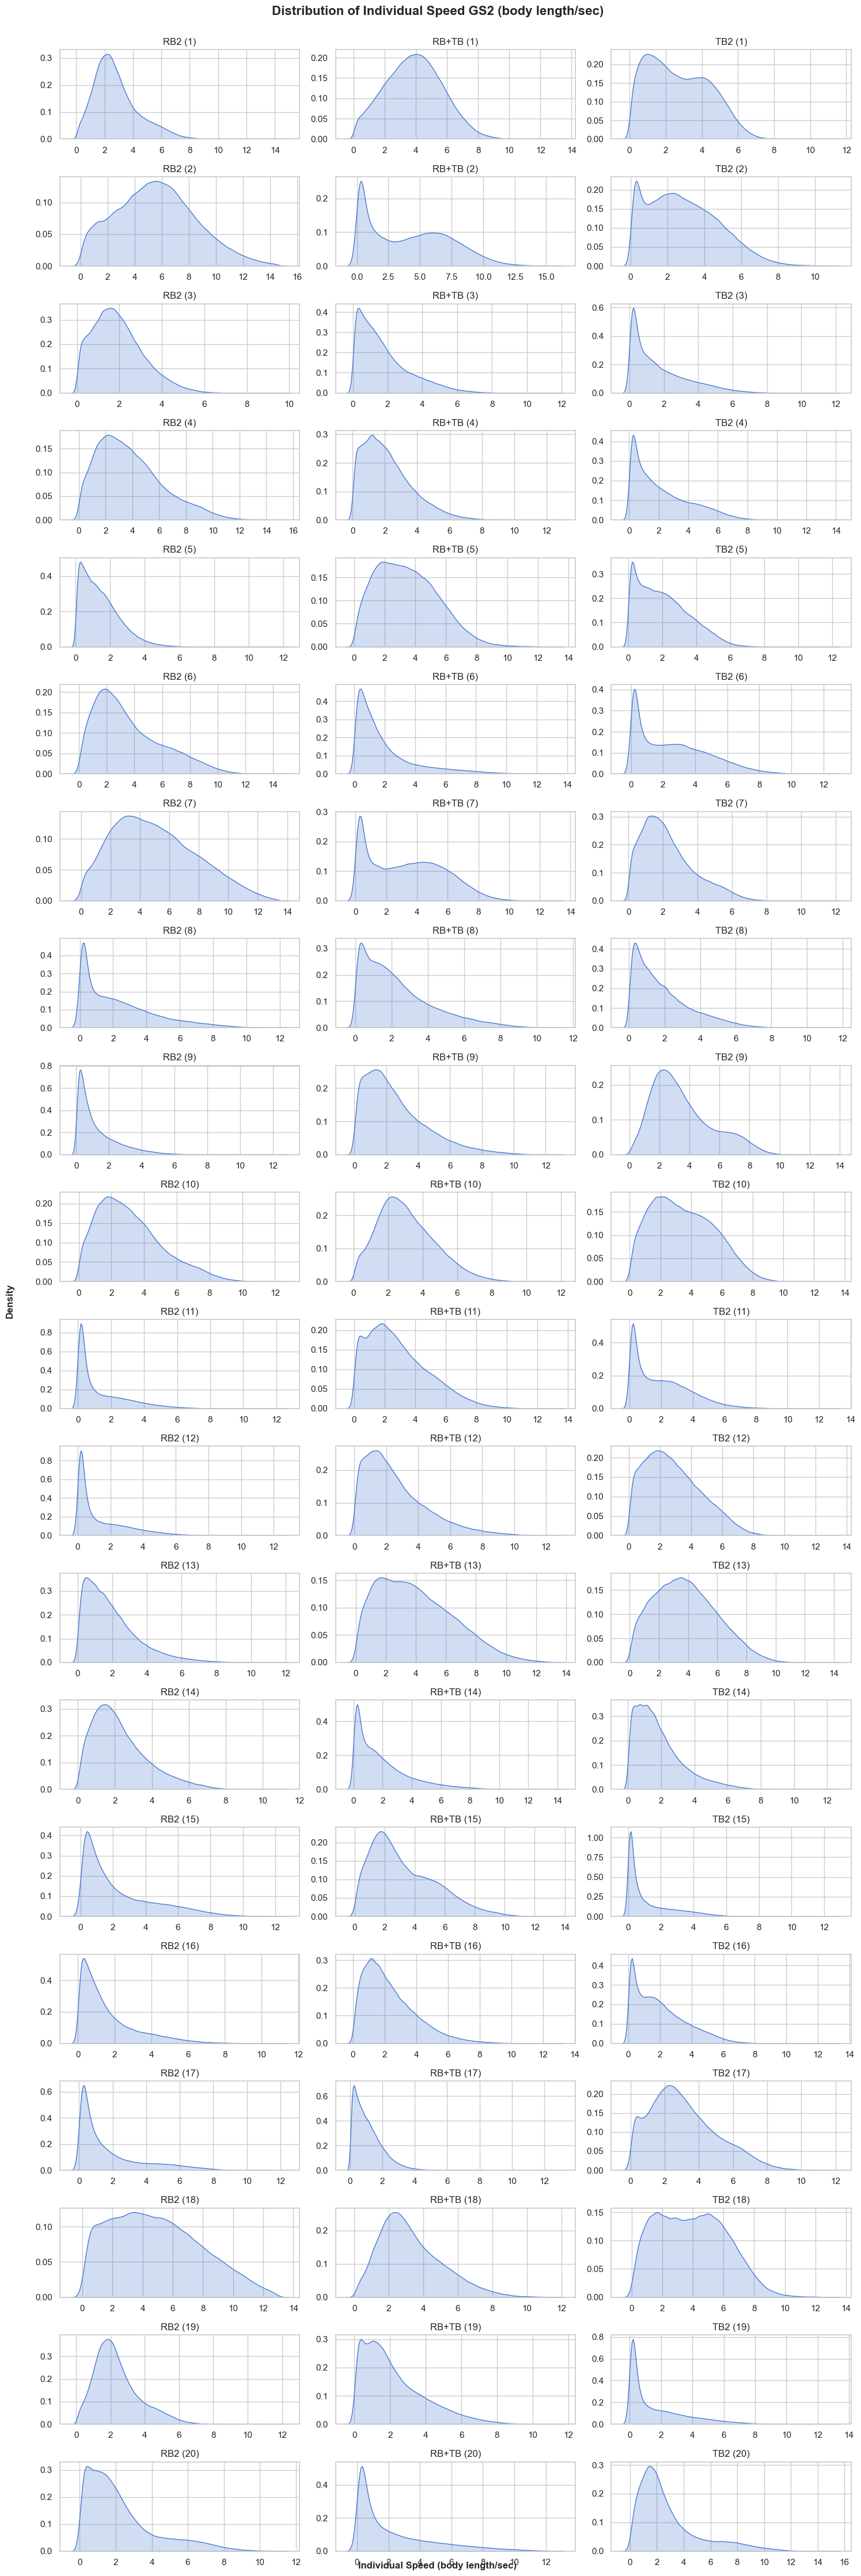

In [14]:
# INDIVIDUAL SPEED PLOT REPLICATES WISE

fig, axes = plt.subplots(20, 3, figsize=(15, 45))

for i in range(20):
    for j in range(3):
        index = i * 20 + j  # Calculate the index of ind_speed
        sns.kdeplot(speed[i][j].ravel(),
                    ax=axes[i, j], fill=True)
        
       # axes[i, j].set_ylim(0, 0.7)
       # axes[i, j].set_xlim(0, 12)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].set_title(f'{treatments[j]} ({replicates[i]})')


fig.suptitle('Distribution of Individual Speed GS2 (body length/sec)', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Individual Speed (body length/sec)', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('distribution_of_individual_speeds_replicatewise_gs2_bl.png', bbox_inches='tight')


In [16]:
# calculating speed diffference

# Speed is the 10x5 matrix of replicate x treatment, where for each data point we have [t, 4] shaped array which stored the magnitude
# speed for each fish at each time point. 

pw_speed_diff = np.empty_like(speed)
for replicate in range(20):
    for treatment in range(3):
        T, N = speed[replicate, treatment].shape
        pw_speed_diff[replicate, treatment] = np.empty((T, N, N))
        for time in range(T):
            speed_diff = (np.subtract.outer(speed[replicate, treatment][time], speed[replicate, treatment][time]))
            np.fill_diagonal(speed_diff, np.nan)
            pw_speed_diff[replicate, treatment][time, :, :] = speed_diff

In [17]:
pw_speed_diff[1][2].shape

(138960, 2, 2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/yx/fr740nw51gx5ylj1n1z8jp7c0000gn/T/ipykernel_1735/2016007264.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


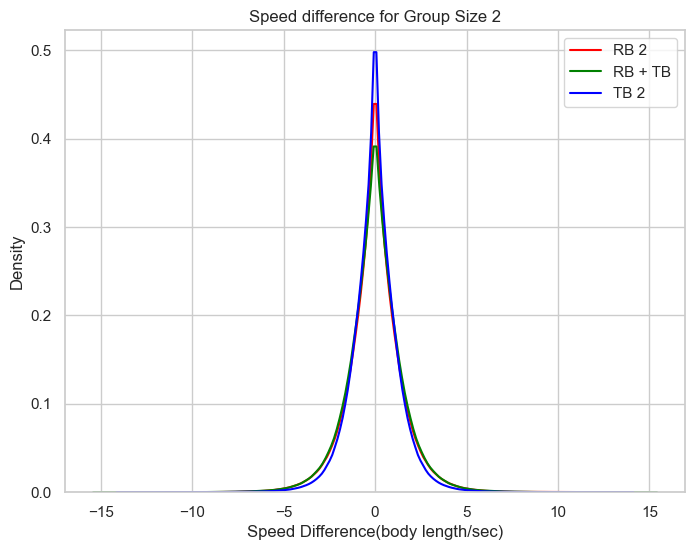

In [18]:
# SPEED DIFFERENCE PLOT

sns.set(style='whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue']
labels = ['RB 2', 'RB + TB', 'TB 2']
for i in range(3): # treatment
    sd = np.empty((0, 2, 2))
    for j in range(20): #replicate
        sd = np.concatenate((sd, pw_speed_diff[j][i]))

    sns.kdeplot(sd.ravel(), fill=False, color=colors[i], label=labels[i])

plt.title("Speed difference for Group Size 2")
plt.xlabel("Speed Difference(body length/sec)")
plt.ylabel("Density")
plt.legend()
fig.show()
fig.savefig('individual_speed_difference_gs2.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

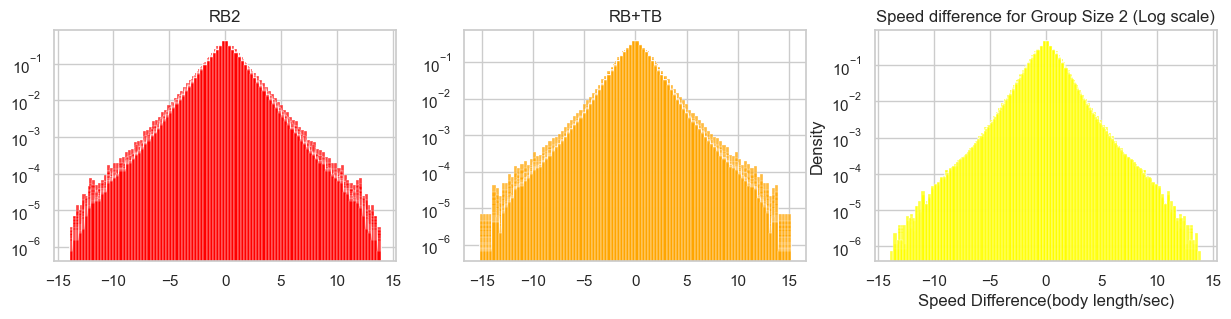

In [19]:
# SPEED DIFFERENCE PLOT (LOG SCALE)

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

colors = ['red', 'orange', 'yellow', 'green', 'blue']

for i in range(3): # treatment
    sd = np.empty((0, 2, 2))
    for j in range(20): #replicate
        sd = np.concatenate((sd, pw_speed_diff[j][i]))
        
        sns.histplot(sd.ravel(), ax=axes[i], bins =100, color=colors[i], kde = False, log=True, stat = 'density')
        
        #axes[i].set_ylim(0, 20)
        #axes[i].set_xlim(0, 1)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        axes[i].set_title(f'{treatments[i]}')

plt.title("Speed difference for Group Size 2 (Log scale)")
plt.xlabel("Speed Difference(body length/sec)")
plt.ylabel("Density")

fig.show()
fig.savefig('individual_speed_difference_gs2_logscale.png', dpi=300, bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

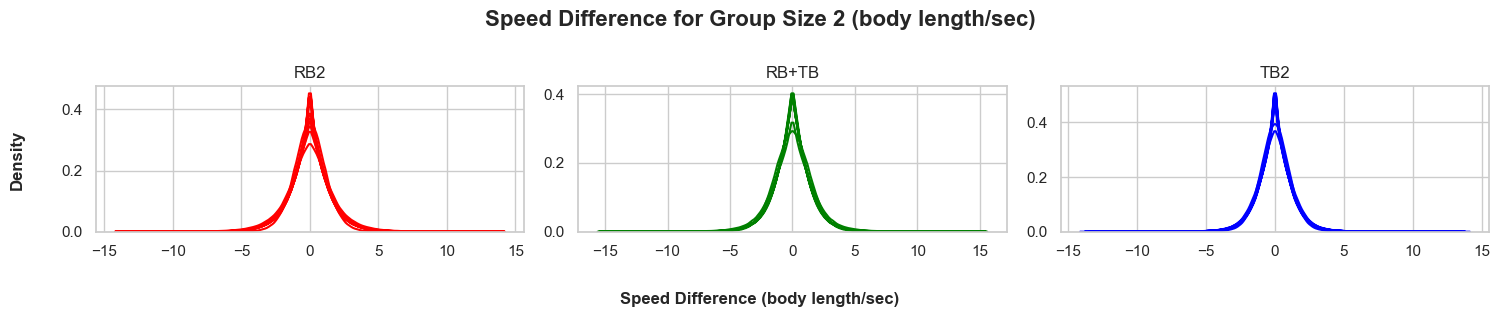

In [24]:
# SPEED DIFFERENCE REPLICATE-WISE

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

colors = ['red','green', 'blue']

for i in range(3): # treatment
    sd = np.empty((0, 2, 2))
    for j in range(20): #replicate
        sd = np.concatenate((sd, pw_speed_diff[j][i]))
        
        sns.kdeplot(sd.ravel(), ax=axes[i], fill=False, color=colors[i])

        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        axes[i].set_title(f'{treatments[i]}')

fig.suptitle('Speed Difference for Group Size 2 (body length/sec)', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Speed Difference (body length/sec)', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('speed_difference_repicatewise_GS2_bl.png', bbox_inches='tight')

In [23]:
speed1.shape

(138960, 2)

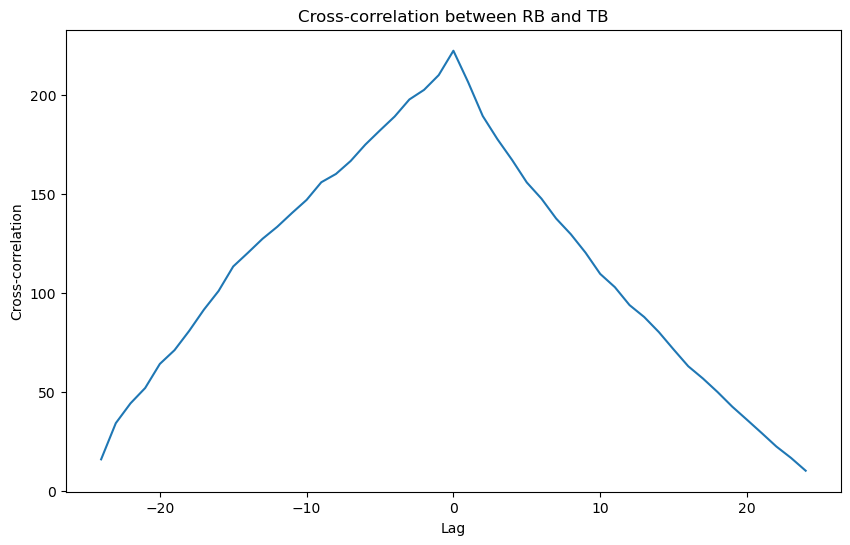

In [45]:
import numpy as np

# Assuming 'col1' and 'col2' are two columns from your dataset as numpy arrays or pandas Series
cross_corr = np.correlate(speed1[0:25,0], speed1[0:25,1], mode='full')
lags = np.arange(-len(speed1[0:25,0]) + 1, len(speed1[0:25,1]))

# Plotting the cross-correlation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between RB and TB')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (999,)

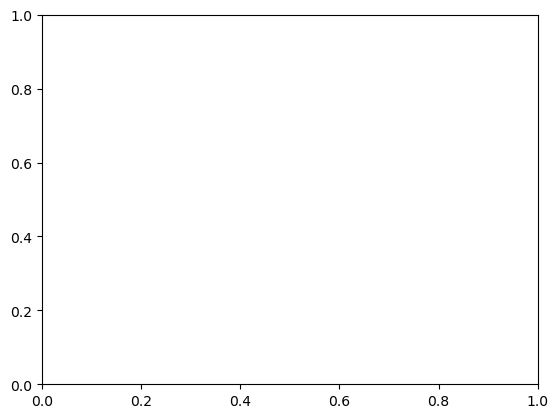

In [46]:
plt.plot(speed1[0:1000,0],speed1[1:1000,1],'.')
plt.show()

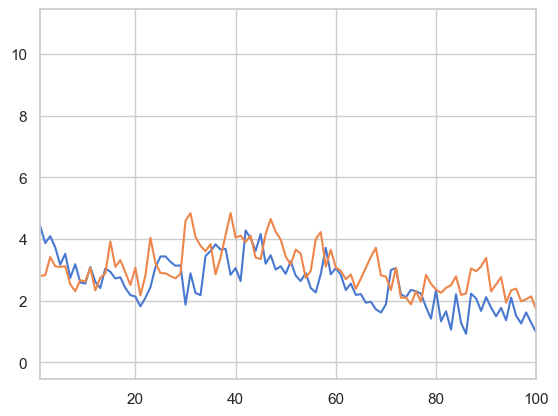

In [37]:
plt.plot(speed1)
plt.xlim(1,100)
plt.show()

#look at autocorrelation and cross correlation between speed of fish 1 and fish 2

/var/folders/yx/fr740nw51gx5ylj1n1z8jp7c0000gn/T/ipykernel_1735/748892155.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


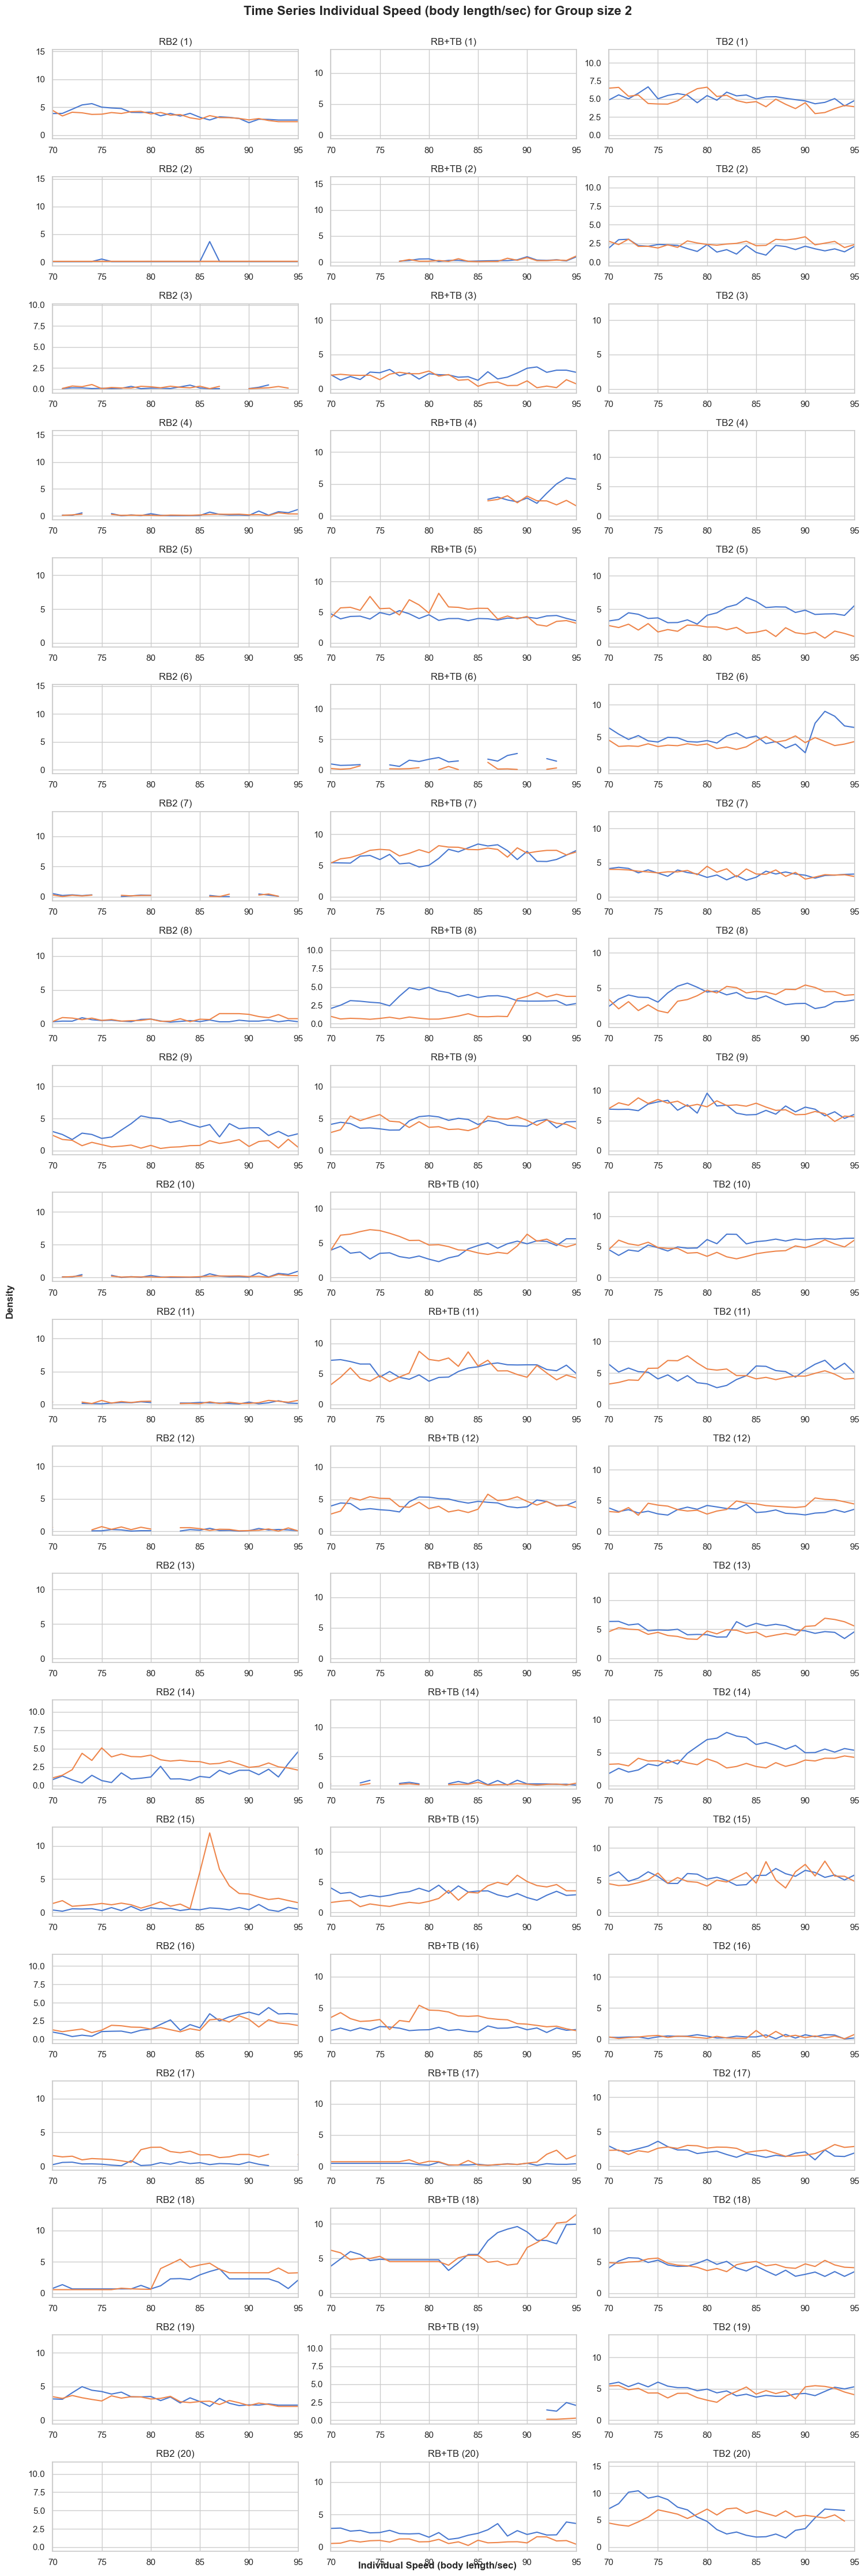

In [28]:
# INDIVIDUAL SPEED PLOT REPLICATES WISE

fig, axes = plt.subplots(20, 3, figsize=(15, 45))

for i in range(20):
    for j in range(3):
        index = i * 20 + j  # Calculate the index of ind_speed
        axes[i,j].plot(speed[i][j])
        
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlim(70,95)
        axes[i, j].set_xlabel('')
        axes[i, j].set_title(f'{treatments[j]} ({replicates[i]})')


fig.suptitle('Time Series Individual Speed (body length/sec) for Group size 2', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Individual Speed (body length/sec)', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('time series_individual_speeds_replicatewise_bodylength_gs2.png', bbox_inches='tight')


In [ ]:
# COHESION PLOTS

In [21]:
#PAIRWISE DISTANCE

pw_dist = np.empty((20,3), dtype = object)
for replicate in range (20):
    for treatment in range (3):
        T, N = pos[replicate, treatment].shape[:2]
        pw_dist[replicate, treatment] = np.empty ((T, N, N))
        for t in range (T):
            pair_dist = squareform(pdist(pos[replicate, treatment][t, :, :]))
            pair_dist[pair_dist == 0] = np.nan
            pw_dist[replicate, treatment][t,:,:] = pair_dist 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/yx/fr740nw51gx5ylj1n1z8jp7c0000gn/T/ipykernel_1735/3305100291.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


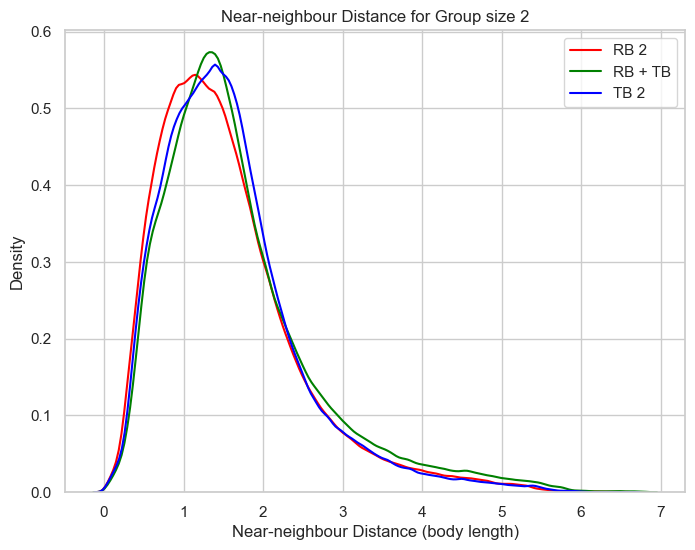

In [25]:
#Pairwise distance plot

sns.set(style='whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize=(8, 6))

colors = ['red',  'green', 'blue']
labels = ['RB 2', 'RB + TB', 'TB 2']
for i in range(3): # treatment
    pd = np.empty((0, 2, 2))
    for j in range(20): #replicate
        pd = np.concatenate((pd, pw_dist[j][i]))

    sns.kdeplot(pd.ravel(), fill=False, color=colors[i], label=labels[i])

plt.title("Near-neighbour Distance for Group size 2")
plt.xlabel("Near-neighbour Distance (body length)")
plt.ylabel("Density")
plt.legend()
fig.show()
fig.savefig('nnd_gs2_plot.png', dpi=300, bbox_inches='tight')

In [14]:
#POLARIZATION

In [57]:
replicates = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
treatments = [
    'RB2',
    'RB+TB',
    'TB2'
]

pol = np.empty((3, 20), dtype=object)

for t, treatment in enumerate(treatments):
    for r, replicate in enumerate(replicates):
        filename = f'/Users/jahanvitiwari/Desktop/Arshad modified codes/cleaned data GS2/GS2_{treatment}_{replicate}_pol.csv'
        try:
            data = pd.read_csv(filename)
            pol[r][t] = data[['pol_x', 'pol_y']].values
        except:
            print(f'File: {filename} not found.')
# for r in replicates:
#     for t in treatments:
#         print(f'/Users/jahanvitiwari/Desktop/Arshad modified codes/cleaned data/MS_RB+TB_{r}_{t}_traj.npz')

In [58]:
polarization = np.empty_like(pol)
for t in range(3):
    for r in range(20):
         polarization[r][t] = np.linalg.norm(pol[r][t], axis=1)

NameError: name 'polarization' is not defined

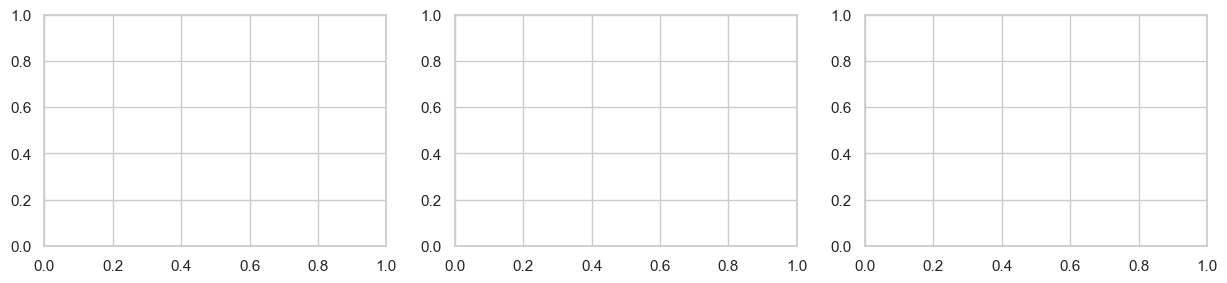

In [20]:
#GROUP POLARIZATION (CONCATENATE)----needs correction

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

colors = ['red', 'green', 'blue']
for i in range(3): # treatment
    p = np.empty((1))
    for j in range(20): #replicate
        p = np.concatenate((p, polarization[i][j]))
  
fig.suptitle('Distribution of Group Polarization GS2', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Group Polarization', fontsize=12, fontweight='bold')
fig.supylabel('Density', x=0, fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('distribution_of_group_polarization_gs2_concatenate.png', bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 5 is out of bounds for axis 1 with size 5

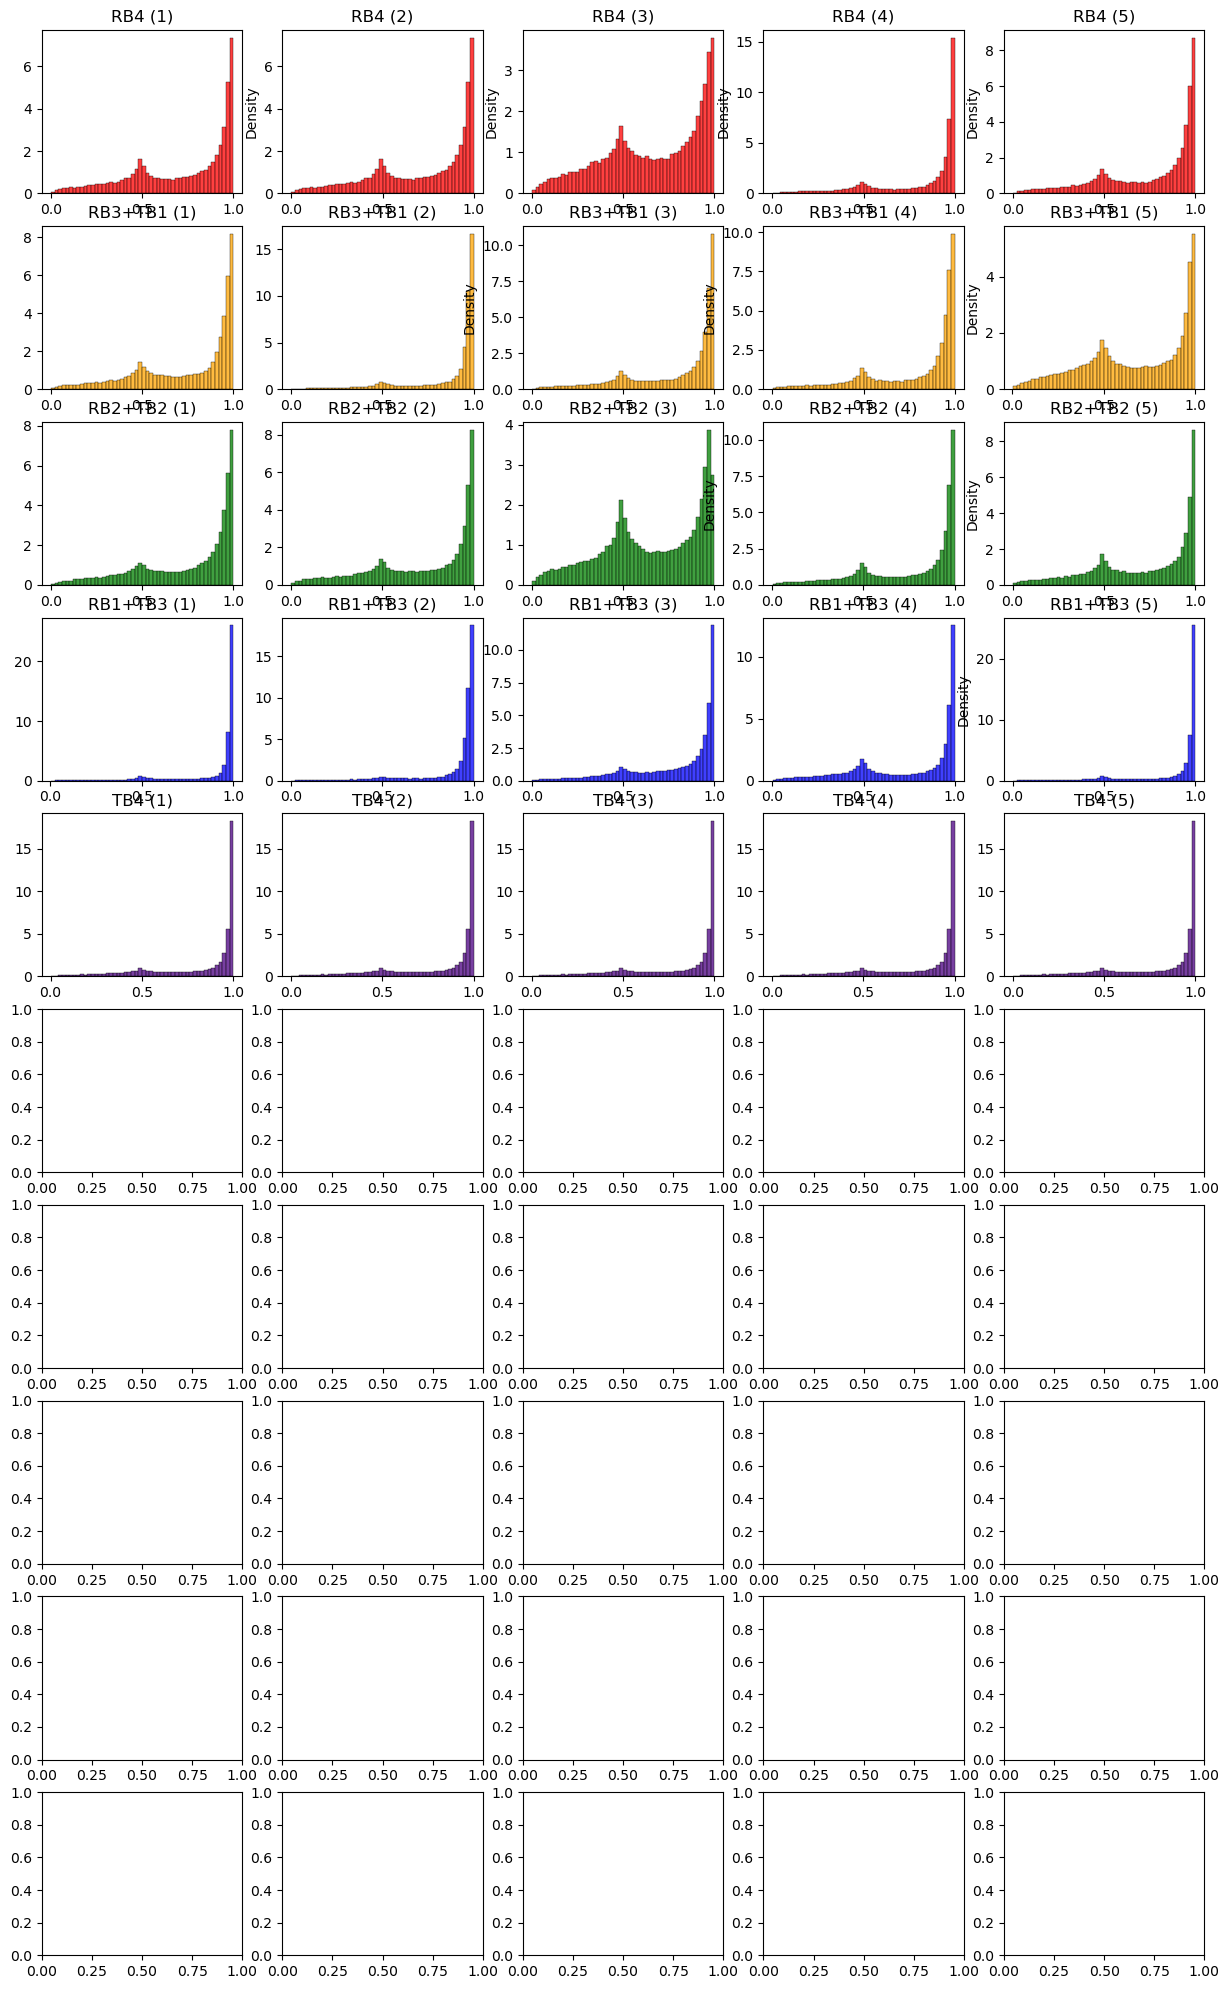

In [70]:
#GROUP POLARIZATION (REPLICATE WISE)

fig, axes = plt.subplots(10, 5, figsize=(15, 25))

colors = ['red', 'orange', 'green', 'blue', 'indigo']

for i in range(10):
    for j in range(5):
        index = i * 10 + j  # Calculate the index of ind_speed
        sns.histplot(polarization[j][i], ax=axes[j, i], 
                     bins=50,
                     color=colors[index % len(colors)], 
                     kde=False, 
                     stat='density') 
       
        #axes[i, j].set_ylim(0, 35)
        #axes[i, j].set_xlim(0, 1)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].set_title(f'{treatments[i]} ({replicates[j]})')


fig.suptitle('Group Polarization GS 4', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Group Polarization', fontsize=12, fontweight='bold')
fig.supylabel('Density', fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('polarization_barbs_histplot_gs4_replicatewise.png', bbox_inches='tight')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

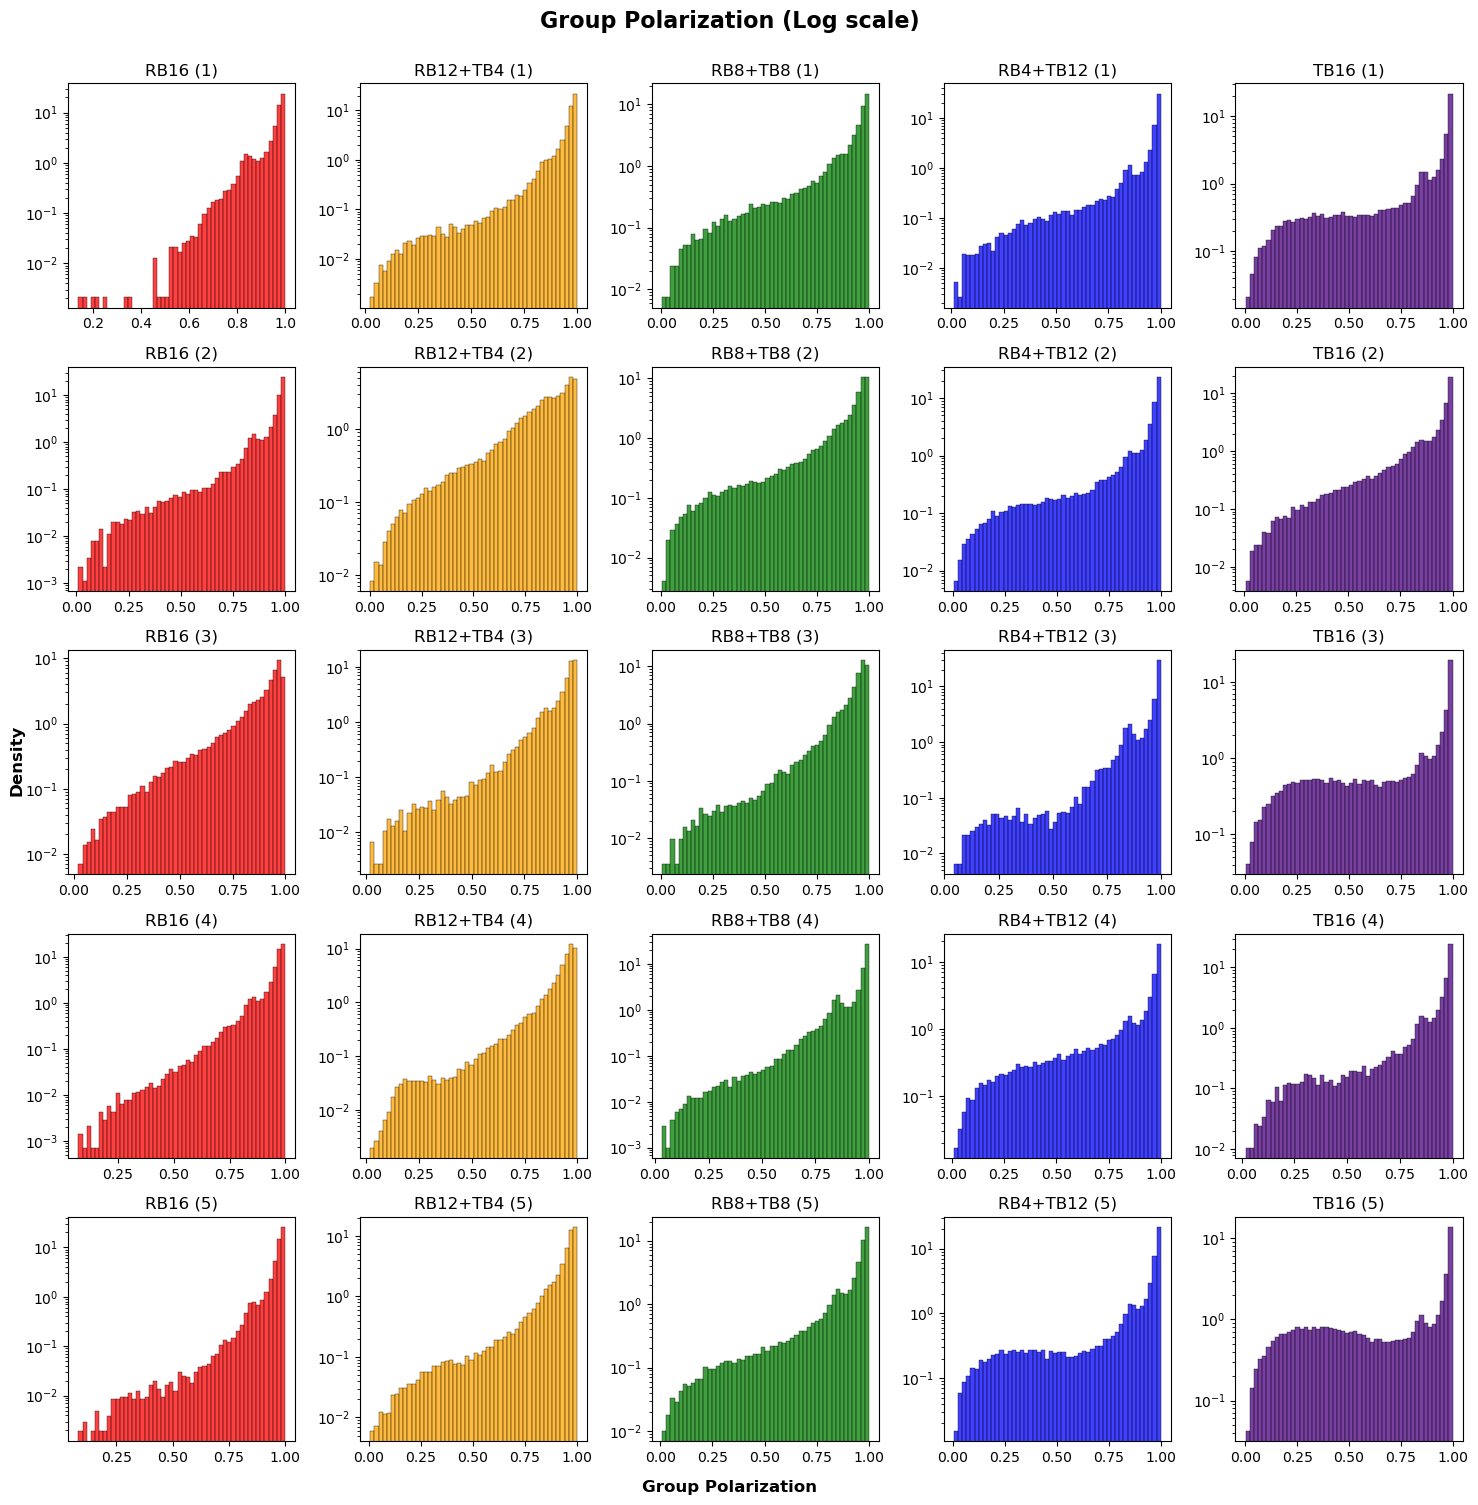

In [17]:
# GROUP POLARIZATION (LOG SCALE-REPLICATE WISE)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))

colors = ['red', 'orange', 'green', 'blue', 'indigo']
for i in range(5):
    for j in range(5):
        index = i * 5 + j 
        sns.histplot(polarization[i][j],
                     ax=axes[i, j], 
                     bins=50, 
                     color=colors[index % len(colors)],  
                     kde=False, log = True, 
                     stat='density') 
        
        #axes[i, j].set_ylim(0, 50)
        #axes[i, j].set_xlim(0, 1)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].set_title(f'{treatments[j]} ({replicates[i]})')

fig.suptitle('Group Polarization (Log scale)', y=1, fontsize=16, fontweight='bold')
fig.supxlabel('Group Polarization', fontsize=12, fontweight='bold')
fig.supylabel('Density', fontsize=12, fontweight='bold')

fig.tight_layout()
fig.show()
fig.savefig('polarization(logscale)_barbs_histplot_replicatewise.png', bbox_inches='tight')